# Procesamiento de Imágenes - Trabajo Práctico N°2
## Grupo 3
* Santiago Arribere
* Matías Francois
* Joaquín Gaytan
* Pablo Scheinfeld

## Ejercicio 2 - *spect.m*
En esta notebook se realiza el análisis del código *spect.m* suministrado por la cátedra, previa traducción del mismo a Python.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

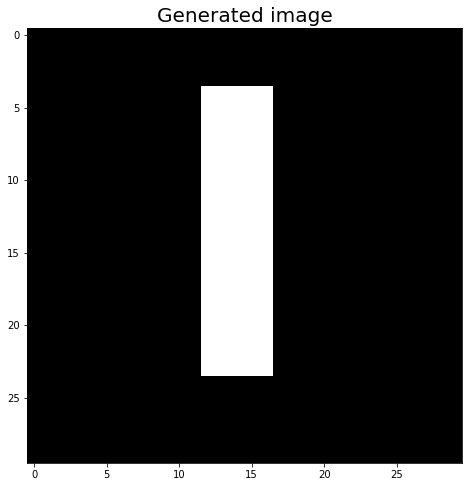

In [2]:
# Translated from 'spect.m' MATLAB script.

# Prepare image
f = np.zeros((30,30), 'double') # double type to replicate MATLAB
f[4:24,12:17] = 1 # inclusive el de la izq, exclusive el de la der - [)
plt.figure(figsize=(10,8))
plt.title('Generated image', fontsize=20)
plt.imshow(f, cmap='gray');

Como resultado del código anterior, se genera una imagen negra cuadrada de 30 píxeles de lado, que contiene un rectángulo de 20x5 píxeles de color blanco.

In [3]:
# Compute Fourier Transform
F = np.fft.fft2(f, s=(256,256))
F = np.fft.fftshift(F) # Center FFT
# Measure the minimum and maximum value of the transform amplitude
print(f'min = {np.min(np.abs(F))}') # 0
print(f'max = {np.max(np.abs(F))}') # 100

min = 0.0
max = 100.0


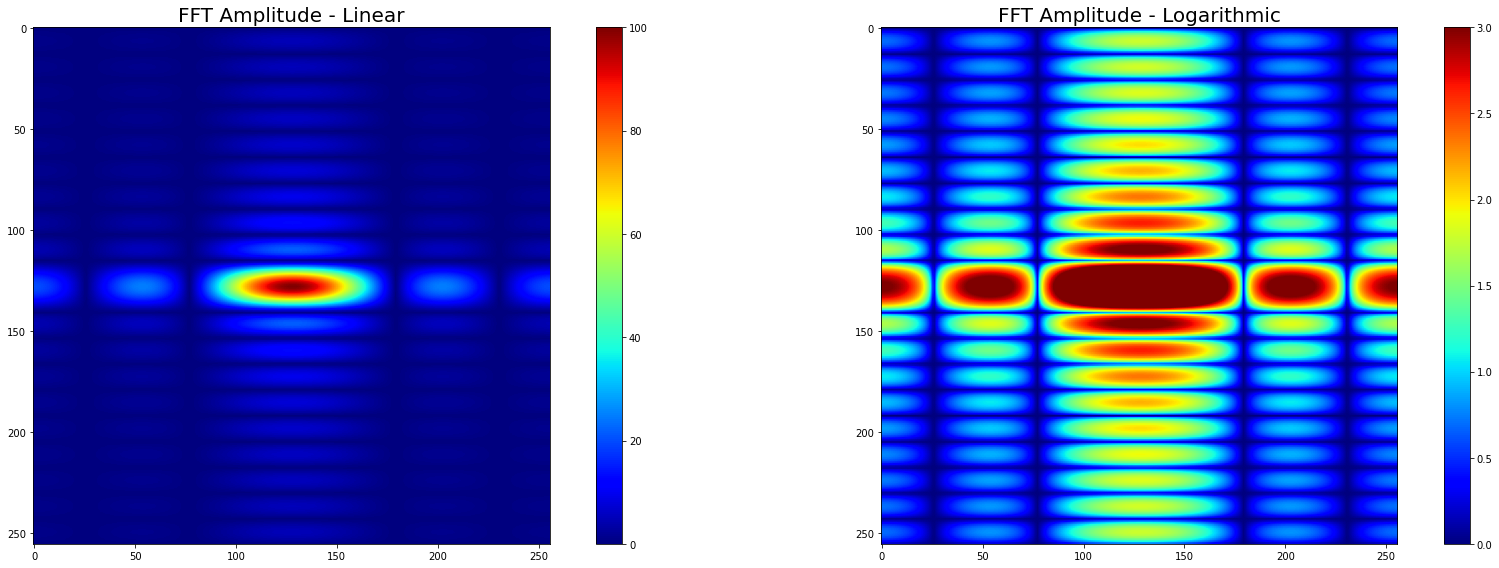

In [4]:
fig, axs = plt.subplots(1,2, figsize=(25, 8), tight_layout=True)

plot = axs[0].imshow(abs(F), cmap='jet', vmin=0, vmax=100)
fig.colorbar(plot, ax=axs[0])
axs[0].set_title('FFT Amplitude - Linear', fontsize=20)

plot = axs[1].imshow(np.log(1+np.abs(F)), cmap='jet', vmin=0, vmax=3)
fig.colorbar(plot, ax=axs[1])
axs[1].set_title('FFT Amplitude - Logarithmic', fontsize=20);

# What is the main difference between representing the amplitude and its logarithm?

Se realiza la FFT bidimensional de la imagen, y se grafica tanto en escala lineal como logarítmica. En principio, se puede destacar en la imagen original las componentes de alta frecuencia debido a los bordes del rectángulo. Estas componentes se ven acentuadas por el cambio de color entre el fondo y el rectángulo, siendo estos dos colores (blanco y negro) opuestos en el rango de representación de cada pixel. Haciendo un paralelismo con señales temporales, si se realizan cortes transversales al rectangulo en ambos ejes, se observa un pulso finito en cada uno de ellos. Estos pulsos tendrán un largo acorde con el tamaño del rectángulo en la dirección del corte. 

En este caso, el pulso generado por el corte vertical es más largo que el producido por el corte horizontal, lo que implica que el pulso del segundo corte tiene un contenido espectral más importante. Ahora bien, la transformada de un escalón en tiempo corresponde a una sinc en frecuencia. Luego, observando los gráficos de amplitud de la FFT se puede ver un patrón en ambas direcciones que hace referencia a cada lóbulo de estas funciones sinc. Se aprecia un mayor contenido espectral a lo largo de la línea horizontal del gráfico, lo que implica que el lóbulo de la sinc que corresponde al corte horizontal es más ancho que el equivalente del corte vertical. Esto se condice con la analogía de los pulsos en tiempo descripta anteriormente.

Respecto a la diferencia entre emplear una escala lineal y una logarítmica para la amplitud de la FFT, se destaca que la escala logarítmica permite observar un rango más grande de amplitudes, a expensas de perder resolución en valores altos.

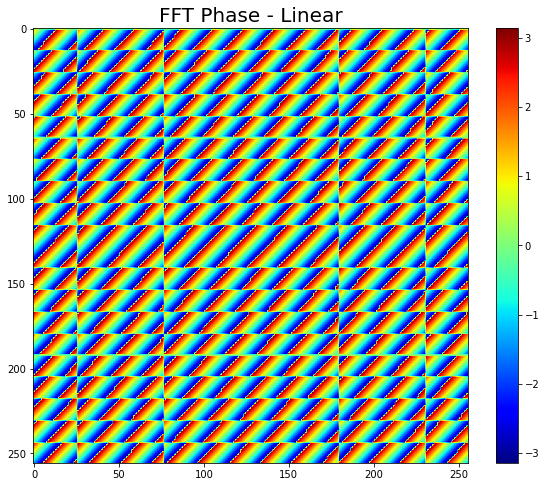

In [5]:
# Look at the phases
plt.figure(figsize=(10,8))
plt.title('FFT Phase - Linear', fontsize=20)
plt.imshow(np.angle(F), cmap='jet', vmin=-1*np.pi, vmax=np.pi)
plt.colorbar();

En el gráfico anterior se muestra la fase de la FFT computada sobre la imagen. En ella se observa un comportamiento que es del tipo lineal, existiendo un corrimiento en cada línea que representa los ceros de las sincs.